In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_d = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
test_d = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')

#### Data Analysis

In [3]:
train_d.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3891,3891,Female,12.00,0,0,No,children,Rural,62.89,27.0,never smoked,0
3206,3206,Male,20.00,0,0,No,Private,Rural,78.00,43.4,formerly smoked,0
13468,13468,Male,26.00,0,0,No,Private,Rural,66.59,21.7,never smoked,0
2200,2200,Female,14.00,0,0,No,children,Rural,81.26,20.5,Unknown,0
11493,11493,Female,25.00,0,0,No,Private,Urban,70.08,23.0,never smoked,0
13347,13347,Female,14.00,0,0,No,children,Urban,112.31,23.8,Unknown,0
1223,1223,Male,1.72,0,0,No,children,Rural,65.08,16.9,Unknown,0
15274,15274,Female,63.00,0,0,Yes,Self-employed,Rural,93.88,29.2,never smoked,0
8731,8731,Male,45.00,0,0,Yes,Private,Urban,67.29,25.1,smokes,0
5850,5850,Male,40.00,0,0,Yes,Private,Rural,77.25,30.2,never smoked,0


In [4]:
print(f"Training set has {train_d.shape[0]} rows and {train_d.shape[1]} columns")
print(f"Testing set has {test_d.shape[0]} rows and {test_d.shape[1]} columns")

Training set has 15304 rows and 12 columns
Testing set has 10204 rows and 11 columns


In [5]:
# Check for missing values in train set
print(f"Number of missing values in training set: {sum(train_d.isnull().sum())}")
print(f"Number of missing values in testing set: {sum(test_d.isnull().sum())}")

Number of missing values in training set: 0
Number of missing values in testing set: 0


In [6]:
# frequency distribution of heart disease
train_d.groupby('stroke').size()

stroke
0    14672
1      632
dtype: int64

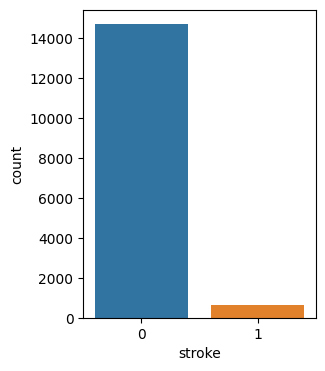

In [7]:
# visualizing the frequency distribution 
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='stroke', data = train_d)
plt.show()

In [8]:
# how many males and females are with or without the disease
train_d.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         9078
        1          368
Male    0         5593
        1          264
Other   0            1
Name: stroke, dtype: int64

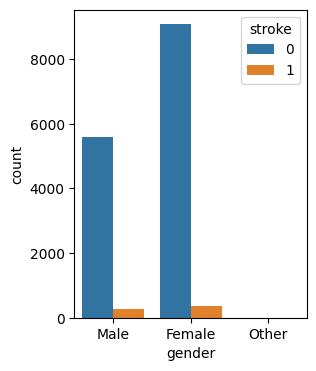

In [9]:
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='gender',hue ='stroke',data = train_d)
plt.show()

In [10]:
train_d.groupby('heart_disease')['stroke'].value_counts()

heart_disease  stroke
0              0         14381
               1           566
1              0           291
               1            66
Name: stroke, dtype: int64

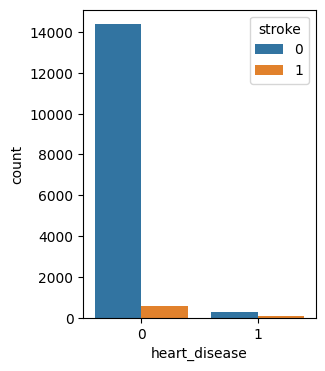

In [11]:
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='heart_disease',hue ='stroke',data = train_d)
plt.show()

In [12]:
train_d.stroke.describe()

count    15304.000000
mean         0.041296
std          0.198981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: stroke, dtype: float64

In [13]:
# finding the correlation between the columns
train_d.corr()['stroke'].sort_values(ascending = True)

/tmp/ipykernel_34/1079956348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_d.corr()['stroke'].sort_values(ascending = True)


id                  -0.017290
bmi                  0.065393
heart_disease        0.111518
hypertension         0.145895
avg_glucose_level    0.149273
age                  0.261320
stroke               1.000000
Name: stroke, dtype: float64

Text(0.5, 1.0, 'stroke distribution')

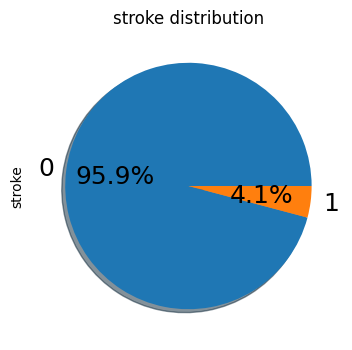

In [14]:
# set the target
y = train_d.stroke

# Pie Plot
plt.figure(figsize=(4,4))
y.value_counts().plot.pie(autopct='%2.1f%%', shadow=True, textprops={'fontsize':18}).set_title("stroke distribution")

##### Data is Highely Imbalanced

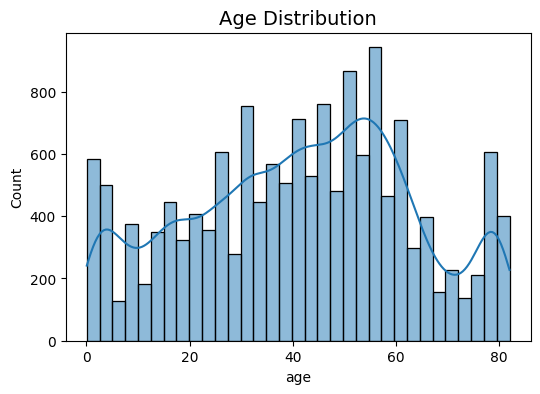

In [15]:
# Age distribution 
plt.figure(figsize=(6, 4))

ax=sns.histplot(data=train_d, x="age",kde=True)
ax.set_title('Age Distribution', fontdict={'fontsize': 14})
plt.show()

Text(0.5, 1.0, 'heart disease distribution')

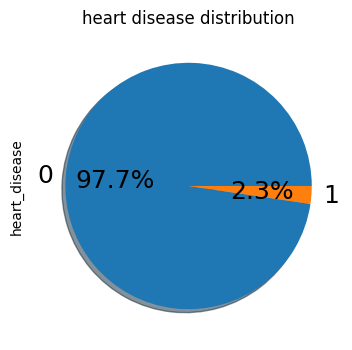

In [16]:
#  set the target
y =train_d.heart_disease

# Pie Plot
plt.figure(figsize=(4,4))
y.value_counts().plot.pie(autopct='%2.1f%%', shadow=True, textprops={'fontsize':18}).set_title("heart disease distribution")

Text(0.5, 1.0, 'work type distribution')

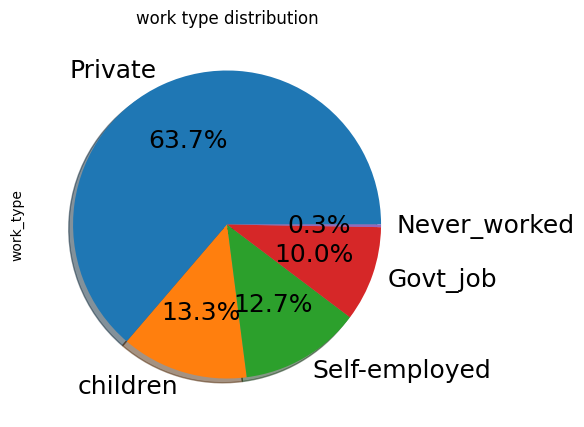

In [17]:
# set the target
y = train_d.work_type

# Pie Plot
plt.figure(figsize=(5,5))
y.value_counts().plot.pie(autopct='%2.1f%%', shadow=True, textprops={'fontsize':18}).set_title("work type distribution")

/tmp/ipykernel_34/1120487629.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_d[columns].corr(), annot=True, cmap='coolwarm', ax=ax)


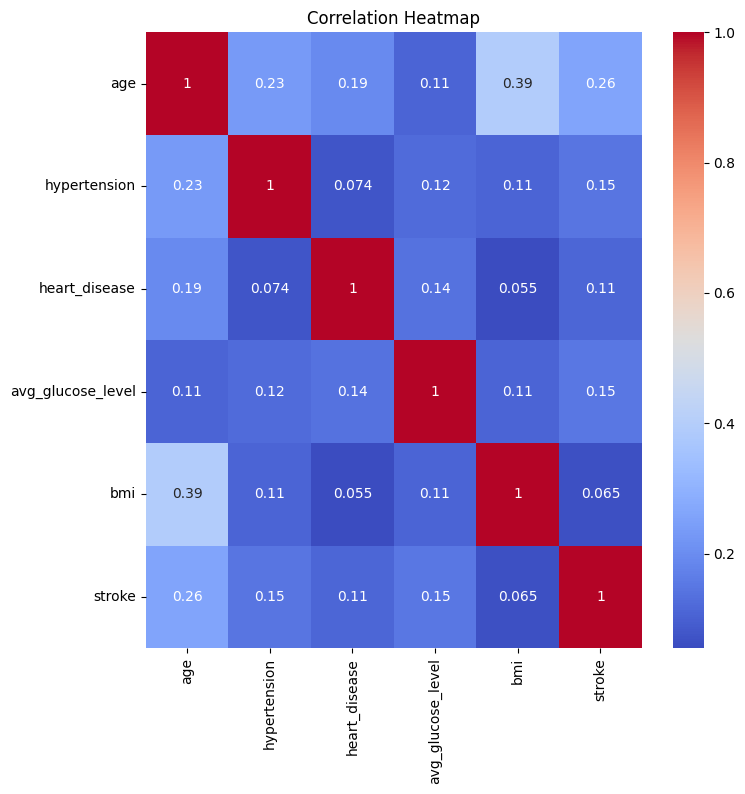

In [18]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_d[columns].corr(), annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap')
plt.show()

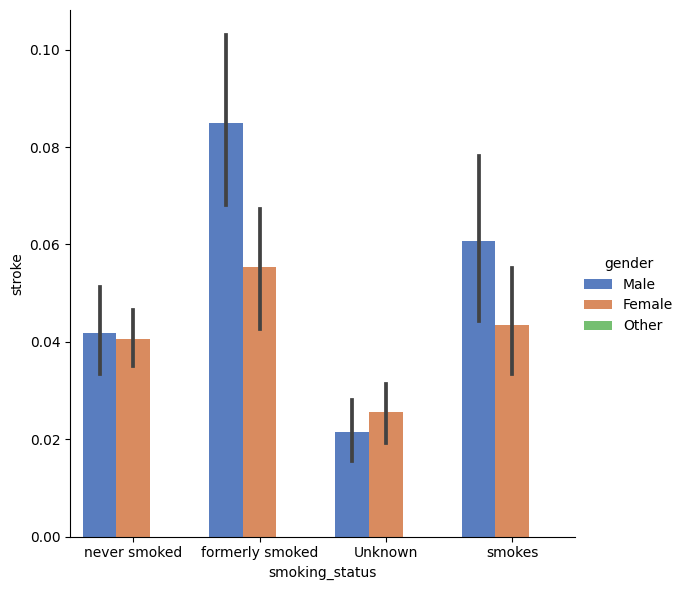

In [19]:
g = sns.catplot(x="smoking_status", y="stroke", hue="gender", data=train_d,
                height=6, kind="bar", palette="muted")


In [22]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    train_d[column] = label_encoder.fit_transform(train_d[column])
    test_d[column] = label_encoder.fit_transform(test_d[column])

In [23]:
test_d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,2,0,82.54,33.4,0
1,15305,1,70.0,1,0,1,2,1,72.06,28.5,0
2,15306,0,5.0,0,0,0,4,1,103.72,19.5,0
3,15307,0,56.0,0,0,1,0,1,69.24,41.4,3
4,15308,1,32.0,0,0,1,2,0,111.15,30.1,3


### Training the Model 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
X = train_d.drop('stroke',axis =1)
y = train_d['stroke']

In [28]:
print(X)
print(y)

          id  gender   age  hypertension  heart_disease  ever_married  \
0          0       1  28.0             0              0             1   
1          1       1  33.0             0              0             1   
2          2       0  42.0             0              0             1   
3          3       1  56.0             0              0             1   
4          4       0  24.0             0              0             0   
...      ...     ...   ...           ...            ...           ...   
15299  15299       0  22.0             0              0             0   
15300  15300       0  46.0             1              0             1   
15301  15301       0  75.0             0              0             1   
15302  15302       1  46.0             0              0             1   
15303  15303       0  14.0             0              0             0   

       work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0              2               1              7

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,roc_auc_score,roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

fold : 1
score : 0.8784835456044997
-----------------------------------------------------
fold : 2
score : 0.8783104837619319
-----------------------------------------------------
fold : 3
score : 0.883926702413732
-----------------------------------------------------
fold : 4
score : 0.880435190999898
-----------------------------------------------------
fold : 5
score : 0.8884371517295852
-----------------------------------------------------
Score over 5-folds : 0.8819186149019294


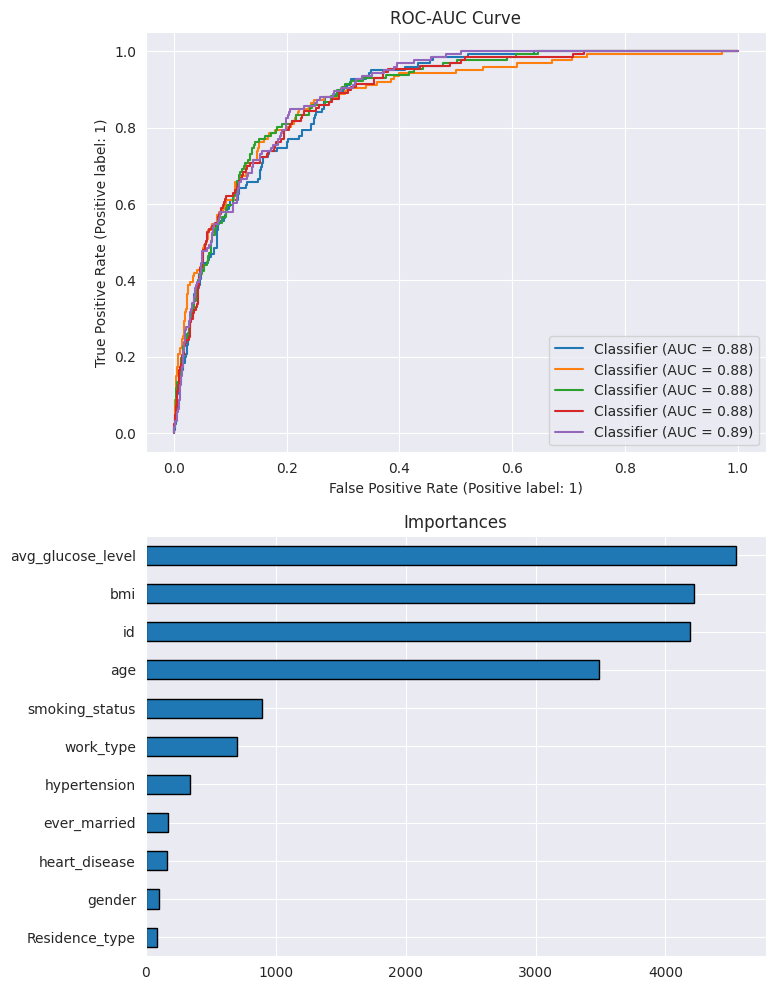

In [31]:
# figure, axes
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 1, figsize=(8,12))
ax[0].set_title('ROC-AUC Curve')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate');
ax[1].set_title('Importances')

# split into X, Y
X = train_d.drop(['stroke'], axis=1).copy()
Y = train_d['stroke'].copy()
X_test = test_d.copy()

lgb_cv_scores = list()
lgb_importances = list()
lgb_preds_test = list()

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

for fold, (train_index, valid_index) in enumerate(skf.split(X, Y)):
    
    # split into train, valid
    X_train, X_test = X.iloc[train_index], X.iloc[valid_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[valid_index]

    # model
    lgb_md = LGBMClassifier(n_estimators = 1000,
                            max_depth = 7,
                            learning_rate = 0.01,
                            num_leaves = 20,
                            reg_alpha = 3,
                            reg_lambda = 3,
                            subsample = 0.7,
                            colsample_bytree = 0.7)
    
    # train
    lgb_md.fit(X_train, Y_train)

    # importances
    lgb_importances.append(lgb_md.feature_importances_)
    
    # validation
    lgb_pred_valid = lgb_md.predict_proba(X_test)[:, 1]
    lgb_cv_scores.append(roc_auc_score(Y_test, lgb_pred_valid))
    RocCurveDisplay.from_predictions(Y_test, lgb_pred_valid,  ax=ax[0])

    # test
    lgb_pred_test = lgb_md.predict_proba(X_test)[:, 1]
    lgb_preds_test.append(lgb_pred_test)

    print(f'fold : {(fold % 5 + 1)}')
    print(f'score : {lgb_cv_scores[-1]}')
    print('-----------------------------------------------------')

# importances
df_importances = pd.DataFrame(lgb_importances, columns=X.columns).apply(np.mean, axis=0).sort_values()
df_importances.plot(kind='barh', align='center', width=0.5, ax=ax[1],  edgecolor='black')

# folds score
lgb_cv_score = np.mean(lgb_cv_scores)    
print(f'Score over 5-folds : {lgb_cv_score}')

In [34]:
predictions = pd.DataFrame(lgb_preds_test).apply(np.mean, axis = 0)

In [35]:
predictions

0       0.012614
1       0.027250
2       0.029899
3       0.107074
4       0.005299
          ...   
3056    0.019830
3057    0.052626
3058    0.003571
3059    0.070791
3060    0.017435
Length: 3061, dtype: float64

In [42]:
# Display some predictions with corresponding IDs
predictions_df = pd.DataFrame({'id': test_d['id'], 'stroke': predictions})


In [41]:
sample_submission['stroke'] = predictions
sample_submission.to_csv('qqsubmission.csv', index = False)